In [1]:
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("C:/Users/DELL/Desktop/EastWestAirlines.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# Normlizing the data
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(data.iloc[:,1:])

In [7]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

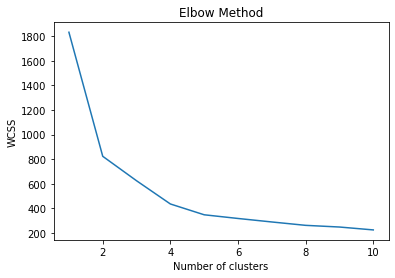

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# curve on 2, 4,5. 
# for 5 cluster
kmeans_clust1=KMeans(n_clusters=5)
kmeans_clust1.fit(df_norm)

KMeans(n_clusters=5)

In [11]:
kmeans_clust1.labels_

array([3, 3, 3, ..., 4, 1, 1])

In [12]:
data["ClusterID"] =pd.Series(kmeans_clust1.labels_)

result=data.iloc[:,1:].groupby(data.ClusterID).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
ClusterID,,,,,,,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,0
1,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,1
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,2
3,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,3
4,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,4


In [13]:
# for 4 cluster
kmeans_clust2=KMeans(n_clusters=4)
kmeans_clust2.fit(df_norm)

KMeans(n_clusters=4)

In [14]:
kmeans_clust2.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [15]:
data["ClusterID"] =pd.Series(kmeans_clust2.labels_)

result=data.iloc[:,1:].groupby(data.ClusterID).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
ClusterID,,,,,,,,,,,,
0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,0
1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0,1
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,2
3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0,3


In [16]:
# data points are belong to 0 th cluster
data[data['ClusterID']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,3954,49519,0,3,1,1,25762,18,0,0,1522,1,0
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,0
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,0
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,0


In [17]:
# data points are belong to 1 th cluster
data[data['ClusterID']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [18]:
# data points are belong to 2 th cluster
data[data['ClusterID']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,2
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,2
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,2
36,37,23193,0,1,1,1,650,4,550,3,7861,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,2
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2


In [19]:
# data points are belong to 3 th cluster
data[data['ClusterID']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,3
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,3
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,3
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,3
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,3
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,3
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,3
